In [6]:
import os
#Añadimos la gráfica que va a usar CUDA al entorno.
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
import torchvision
import torchvision.transforms as transforms
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *

from torch.autograd import Variable



In [7]:
def es_correcta(imagen) : return imagen[0].isupper()

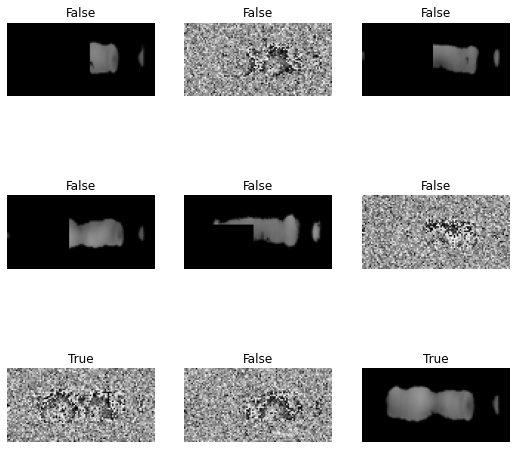

In [8]:
path = Path('./DatasetSoldadurasJuntas/')
#path.ls()
#files = get_image_files(path)
#print(len(files))
#cwd = os.getcwd()
#print(cwd)
#dls = ImageDataLoaders.from_folder(path, valid_pct=0.2 , bs=9)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, bs=10, seed=42,
    label_func=es_correcta
)
dls.show_batch()


In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.687182,0.394428,0.150000,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.378521,0.363852,0.120000,01:06


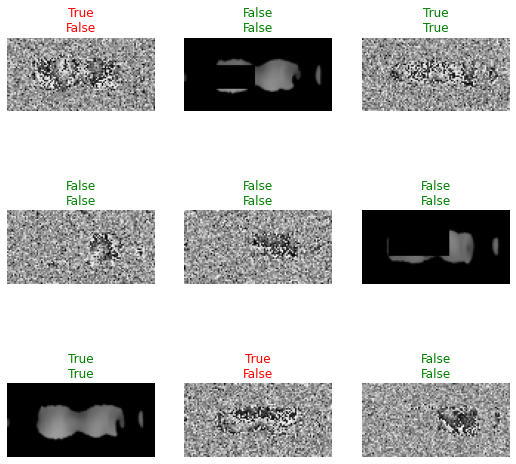

In [10]:
learn.show_results()

In [3]:
transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

path = './DatasetSoldadurasFinal/'

trainset = torchvision.datasets.ImageFolder(root = path,
                                           transform = transform)
train_loader = torch.utils.data.DataLoader(trainset , batch_size = 4,
                                            shuffle = True,
                                            drop_last = False,
                                            num_workers = 2)

In [67]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def gaussian(ins, is_training, mean, stddev):
    if is_training:
        noise = Variable(ins.data.new(ins.size()).normal_(mean, stddev))
        return ins + noise
    return ins

pil_img = Image.open('./DatasetSoldaduras/NFD1/Pieza_15_Soldadura_77.png')
#pil_img = Image.open('./DatasetSoldaduras/NFD1/download.jpg').convert('RGB')
trans_T = transforms.ToTensor()
trans_S = transforms.Resize((200,1000))
trans_P = transforms.ToPILImage()
#trans_P(trans_S(trans_T(pil_img))).show()

transform=transforms.Compose([
    #transforms.Resize((50,150)),
    transforms.ToTensor(),
    #transforms.Normalize((0.1,), (0.3,)),
    AddGaussianNoise(0.3 , 0.04 )
    #AddGaussianNoise(0 , 1 )
])

pil_img = gaussian(trans_T(pil_img), True, 0.3, 0.04)
#print(pil_img)
pil_img = trans_P(pil_img)
pil_img.show()
#pil_img = trans_P(transform(pil_img))

#pil_img = trans_S(pil_img)
print(pil_img)
#display(pil_img)
pil_img.show()


#img = cv2.imread('./DatasetSoldaduras/NFD1/Pieza_15_Soldadura_77.png')
#blur = cv2.GaussianBlur(img, (5,5), 0)
#plt.imshow(blur)
#cv2.imwrite('Gauss.png',blur)



<PIL.Image.Image image mode=L size=480x80 at 0x7FF5D5C09700>


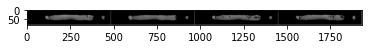

In [37]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))